In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
#command to tell python to display the graphs

In [3]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [4]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [5]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


## Find answers to following queries:
#### Q.1- Which team has won/lost maximum number of matches while chasing?

#### Q.2- Which toss decision is best for each ground?

In [6]:
l = matches[(matches['toss_decision']=='bat') & (matches['toss_winner']!=matches['team1'])]
l.count()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

#### This shows team 1 always bats first, and team 2 is the chasing team

In [7]:
# Ans 1
teams_won_chase = matches[(matches['team2']==matches['winner']) & (matches['result']=='normal')]

In [8]:
teams_won_chase['winner'].value_counts().head(1)

Kolkata Knight Riders    58
Name: winner, dtype: int64

In [9]:
team_lost_chase = matches[(matches['team2']!=matches['winner']) & (matches['result']=='normal')]

In [10]:
team_lost_chase['team2'].value_counts().head(1)

Delhi Daredevils    47
Name: team2, dtype: int64

In [11]:
# Ans 2
team1_win_venue = matches[(matches['team1']==matches['winner']) & (matches['result']=='normal') ].groupby('venue').agg({'team1':'count'})

In [12]:
team1_win_venue.head()

,team1
venue,
Barabati Stadium,4
Brabourne Stadium,6
Buffalo Park,2
De Beers Diamond Oval,1
Dr DY Patil Sports Academy,7


In [13]:
team2_win_venue = matches[(matches['team2']==matches['winner']) & (matches['result']=='normal')].groupby('venue').agg({'team2':'count'})

In [14]:
team2_win_venue.head()

,team2
venue,
ACA-VDCA Stadium,2
Barabati Stadium,3
Brabourne Stadium,5
Buffalo Park,1
De Beers Diamond Oval,2


In [15]:
decision_best = team1_win_venue.join(team2_win_venue,how="outer")

In [16]:
decision_best.fillna(0,inplace=True)

In [17]:
decision_best.head()

,team1,team2
venue,,
ACA-VDCA Stadium,0.0,2
Barabati Stadium,4.0,3
Brabourne Stadium,6.0,5
Buffalo Park,2.0,1
De Beers Diamond Oval,1.0,2


In [18]:
decision_best.loc[decision_best["team1"]>decision_best["team2"],"Decision"]="bat"

In [19]:
decision_best.loc[decision_best["team1"]<decision_best["team2"],"Decision"]="field"

In [20]:
decision_best.loc[decision_best["team1"]==decision_best["team2"],"Decision"]="bat/field"

In [21]:
decision_best.head(3)

,team1,team2,Decision
venue,,,
ACA-VDCA Stadium,0.0,2,field
Barabati Stadium,4.0,3,bat
Brabourne Stadium,6.0,5,bat


### Conclusion:
This table shows that the toss_winner should choose the option given in 'Decision' Column.
##### Why?
In given dataset,team1 is the one batting first, so in table decision_best, 'team1' column = no. of matches won on a field when batting is done first. While 'team2' column = no. of matches won on a field when batting was done latter

#### Q.3- Which player has won maximum number of MoM awards while chasing?

In [22]:
# Ans3
# batsman's batting team= mom's team = should be team2
chasing = matches.loc[:,['id','player_of_match', 'team2']]
batting_team = deliveries.loc[:,['match_id', 'batsman', 'non_striker', 'batting_team', 'bowler', 'bowling_team']]

In [23]:
MoM_winner_data = pd.merge(chasing, batting_team, how='inner', left_on='id', right_on='match_id')

In [24]:
MoM_winner_data.drop('match_id', axis=1, inplace=True)

In [25]:
MoM_winner_data.head(3)

,id,player_of_match,team2,batsman,non_striker,batting_team,bowler,bowling_team
0,1,Yuvraj Singh,Royal Challengers Bangalore,DA Warner,S Dhawan,Sunrisers Hyderabad,TS Mills,Royal Challengers Bangalore
1,1,Yuvraj Singh,Royal Challengers Bangalore,DA Warner,S Dhawan,Sunrisers Hyderabad,TS Mills,Royal Challengers Bangalore
2,1,Yuvraj Singh,Royal Challengers Bangalore,DA Warner,S Dhawan,Sunrisers Hyderabad,TS Mills,Royal Challengers Bangalore


In [26]:
#equatting MoM with batsman or bowler
MoM_winner_data = MoM_winner_data[(((MoM_winner_data['player_of_match']==MoM_winner_data['batsman'])| (MoM_winner_data['player_of_match']==MoM_winner_data['non_striker'])) & (MoM_winner_data['team2']==MoM_winner_data['batting_team'])) 
                                  | ((MoM_winner_data['player_of_match']==MoM_winner_data['bowler']) & (MoM_winner_data['team2']==MoM_winner_data['bowling_team']))]

In [27]:
MoM_winner_data.head()

,id,player_of_match,team2,batsman,non_striker,batting_team,bowler,bowling_team
393,2,SPD Smith,Rising Pune Supergiant,SPD Smith,AM Rahane,Rising Pune Supergiant,MJ McClenaghan,Mumbai Indians
394,2,SPD Smith,Rising Pune Supergiant,SPD Smith,AM Rahane,Rising Pune Supergiant,MJ McClenaghan,Mumbai Indians
395,2,SPD Smith,Rising Pune Supergiant,AM Rahane,SPD Smith,Rising Pune Supergiant,MJ McClenaghan,Mumbai Indians
396,2,SPD Smith,Rising Pune Supergiant,SPD Smith,AM Rahane,Rising Pune Supergiant,MJ McClenaghan,Mumbai Indians
397,2,SPD Smith,Rising Pune Supergiant,SPD Smith,AM Rahane,Rising Pune Supergiant,MJ McClenaghan,Mumbai Indians


#### Here, team2 is the chasing team, and the dataframe gives the name of all those mom winners who played in the chasing team (who either played as bowler or batsman)

In [28]:
MoM_winner_data.drop_duplicates('id', inplace=True)

In [29]:
MoM_winner_data.head()

,id,player_of_match,team2,batsman,non_striker,batting_team,bowler,bowling_team
393,2,SPD Smith,Rising Pune Supergiant,SPD Smith,AM Rahane,Rising Pune Supergiant,MJ McClenaghan,Mumbai Indians
617,3,CA Lynn,Kolkata Knight Riders,G Gambhir,CA Lynn,Kolkata Knight Riders,P Kumar,Gujarat Lions
906,4,GJ Maxwell,Kings XI Punjab,AR Patel,GJ Maxwell,Kings XI Punjab,RD Chahar,Rising Pune Supergiant
1232,6,Rashid Khan,Sunrisers Hyderabad,JJ Roy,BB McCullum,Gujarat Lions,Rashid Khan,Sunrisers Hyderabad
1603,7,N Rana,Mumbai Indians,N Rana,JC Buttler,Mumbai Indians,Kuldeep Yadav,Kolkata Knight Riders


In [30]:
#getting the player winning maximum MoM awards
MoM_winner_data_2 = MoM_winner_data.groupby('player_of_match').agg({'id':'count'})

In [31]:
MoM_winner_data_2.sort_values('id', ascending=False, inplace=True)

In [32]:
MoM_winner_data_2.columns=['Matches_won']

In [33]:
MoM_winner_data_2.head(2)

,Matches_won
player_of_match,
YK Pathan,12
G Gambhir,10


#### here Matches won shows the count of all the matches won by the player and it is calculated by counting the no. of matchids

#### Q.4- Which batsman has played maximum number of dot balls?

In [34]:
deliveries['player_dismissed'].fillna('none', inplace=True)
dot_balls_data = deliveries[(deliveries['total_runs']==0) & (deliveries['player_dismissed']=='none')]

In [35]:
dot_balls_data['batsman'].value_counts().head(2)

V Kohli     1223
S Dhawan    1184
Name: batsman, dtype: int64

#### Q.5- Which batsmen came to crease but never got a chance to face a ball?

In [36]:
set(deliveries["non_striker"].unique())-set(deliveries["batsman"].unique())

{'A Nel', 'BW Hilfenhaus', 'C Ganapathy', 'TP Sudhindra'}

#### Q.6-Which bowler has hit for maximum number of 1s/2s/3s/4s/6s?

In [37]:
deliveries[deliveries["total_runs"]==6]["bowler"].value_counts().head(1)

PP Chawla    171
Name: bowler, dtype: int64

In [38]:
deliveries[deliveries["total_runs"]==4]["bowler"].value_counts().head(1)

UT Yadav    389
Name: bowler, dtype: int64

In [39]:
deliveries[deliveries["total_runs"]==3]["bowler"].value_counts().head(1)

P Kumar    18
Name: bowler, dtype: int64

In [40]:
deliveries[deliveries["total_runs"]==2]["bowler"].value_counts().head(1)

DJ Bravo    258
Name: bowler, dtype: int64

In [41]:
deliveries[deliveries["total_runs"]==1]["bowler"].value_counts().head(1)

Harbhajan Singh    1549
Name: bowler, dtype: int64

#### Q7- Which batsman got stumped out maximum number of times?

#### Q8- Which non-striker has been part of maximum number of runouts?

In [42]:
#Ans 7
deliveries[deliveries["dismissal_kind"]=="stumped"]["batsman"].value_counts().head(1)

SK Raina    8
Name: batsman, dtype: int64

In [43]:
# Ans 8
deliveries[deliveries["dismissal_kind"]=="run out"]["non_striker"].value_counts().head()

SK Raina      16
KD Karthik    16
RG Sharma     15
RV Uthappa    14
YK Pathan     14
Name: non_striker, dtype: int64

#### Q9- Make at least 5 more new queries and find answers to them.

1. Number of matches held season wise

Text(0,0.5,'No. of Matches')

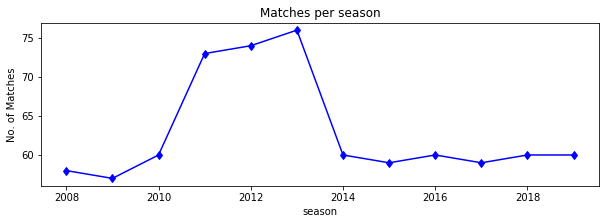

In [44]:
# Ans 9.1
fig = plt.figure()
ax = fig.add_subplot(111)
ax=matches.groupby("season")["id"].count().plot(kind="line",title="Matches per season", marker='d',color=['blue'],figsize=(10,3)) 
plt.ylabel("No. of Matches")

2. Success rate of winning matches of every team

In [57]:
# Ans 9.2
matches_won_by_a_team = matches.groupby('winner').count()
matches_won_by_a_team.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
winner,,,,,,,,,,,,,,,,,
Chennai Super Kings,100,100,98,100,100,100,100,100,100,100,100,100,100,100,100,100,21
Deccan Chargers,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,0
Delhi Capitals,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9
Delhi Daredevils,67,67,66,67,67,67,67,67,67,67,67,67,67,67,67,67,5
Gujarat Lions,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,0


In [51]:
total_matches_played_by_a_team = matches['team1'].value_counts() + matches['team2'].value_counts()
#creating a new column for total matches
matches_won_by_a_team['Total matches'] = total_matches_played_by_a_team

In [52]:
matches_won_by_a_team.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Total matches
winner,,,,,,,,,,,,,,,,,,
Chennai Super Kings,100,100,98,100,100,100,100,100,100,100,100,100,100,100,100,100,21,164
Deccan Chargers,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,0,75
Delhi Capitals,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,16
Delhi Daredevils,67,67,66,67,67,67,67,67,67,67,67,67,67,67,67,67,5,161
Gujarat Lions,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,0,30


In [55]:
winning_dataset = matches_won_by_a_team[['Total matches','result']]
winning_dataset.head(3)

,Total matches,result
winner,,
Chennai Super Kings,164,100
Deccan Chargers,75,29
Delhi Capitals,16,10


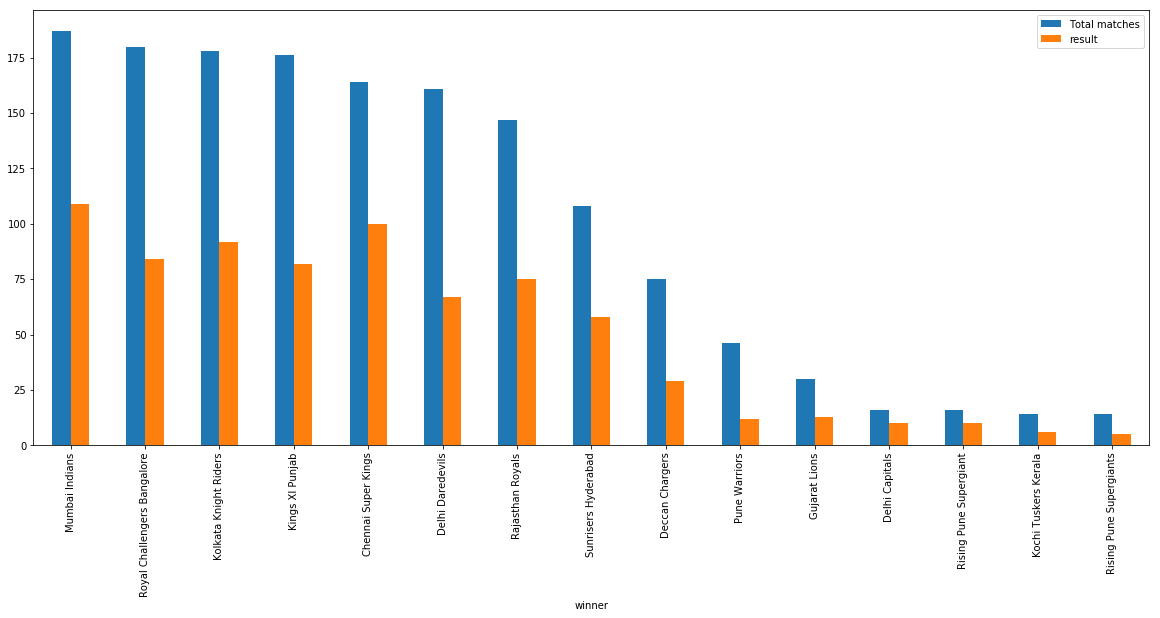

In [56]:
ax = winning_dataset[['Total matches','result']].sort_values('Total matches',ascending=False)
ax.plot.bar(figsize=(20,8))

In [62]:
success_rate= ((matches_won_by_a_team['id'])*100/total_matches_played_by_a_team)
success_rate.sort_values(ascending = False, inplace=True)

In [64]:
import seaborn as sns 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

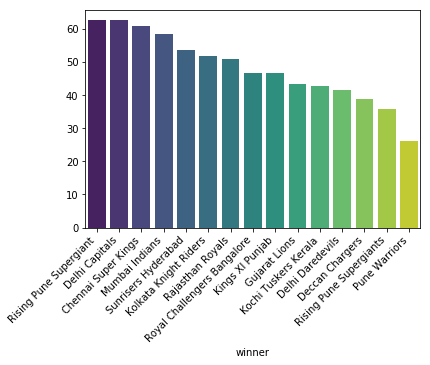

In [73]:
ax1 = sns.barplot(x = success_rate.index, y = success_rate, palette='viridis' )
plt.xticks(rotation=45, ha = 'right')

3. Teams who won toss and became winner

In [96]:
# Ans 9.3
toss_game_winner = matches[matches['toss_winner']==matches['winner']]
toss_game_winner.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [95]:
toss_game_winner.groupby('toss_winner').agg('count')['id']

toss_winner
Chennai Super Kings            57
Deccan Chargers                19
Delhi Capitals                  7
Delhi Daredevils               35
Gujarat Lions                  10
Kings XI Punjab                35
Kochi Tuskers Kerala            4
Kolkata Knight Riders          53
Mumbai Indians                 56
Pune Warriors                   3
Rajasthan Royals               42
Rising Pune Supergiant          5
Rising Pune Supergiants         3
Royal Challengers Bangalore    41
Sunrisers Hyderabad            23
Name: id, dtype: int64

4. How many matches lost by chasing team ?

In [107]:
matches_lost = matches[(matches['team2']!=matches['winner']) & (matches['result']=='normal')]

In [110]:
matches_lost.groupby('team2').count()['id']

team2
Chennai Super Kings            25
Deccan Chargers                21
Delhi Capitals                  3
Delhi Daredevils               47
Gujarat Lions                   4
Kings XI Punjab                41
Kochi Tuskers Kerala            3
Kolkata Knight Riders          35
Mumbai Indians                 35
Pune Warriors                  19
Rajasthan Royals               32
Rising Pune Supergiant          3
Rising Pune Supergiants         2
Royal Challengers Bangalore    45
Sunrisers Hyderabad            16
Name: id, dtype: int64

5. Each Season Winner

In [111]:
season_winner = matches.groupby('season')['season','winner'].tail(1)
season_winner.sort_values(by="season",ascending=True)

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians
